In [1]:
### Q4.4
install.packages('Stat2Data', repos='http://cran.us.r-project.org')
library(Stat2Data)
data(Fertility)
str(Fertility)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)



'data.frame':	333 obs. of  10 variables:
 $ Age       : int  40 37 40 40 30 29 31 33 36 35 ...
 $ LowAFC    : int  40 41 38 36 36 35 24 28 30 32 ...
 $ MeanAFC   : num  51.5 41 41 37.5 36 35 35 34 33 32 ...
 $ FSH       : num  5.3 7.1 4.9 3.9 4 3.9 3.8 4.3 4.9 3.7 ...
 $ E2        : int  45 53 40 26 49 67 49 20 60 36 ...
 $ MaxE2     : int  1427 802 4533 1804 2526 3812 1087 1615 1879 2009 ...
 $ MaxDailyGn: num  300 225 450 300 150 ...
 $ TotalGn   : num  2700 1800 4850 2700 1500 ...
 $ Oocytes   : int  25 7 27 9 19 19 13 15 23 26 ...
 $ Embryos   : int  13 6 15 4 12 16 9 9 10 8 ...


In [2]:
# part a
datanoLOWAFC = Fertility[,-2]
cor(datanoLOWAFC)

,Age,MeanAFC,FSH,E2,MaxE2,MaxDailyGn,TotalGn,Oocytes,Embryos
Age,1.00000000,-0.2296947,0.27438884,-0.02338577,-0.10237751,0.56896018,0.52095315,-0.1131005,-0.12781624
MeanAFC,-0.22969466,1.0000000,-0.29637031,-0.12732853,0.24568191,-0.39666552,-0.38392056,0.4172390,0.34640339
FSH,0.27438884,-0.2963703,1.00000000,-0.07135229,-0.22429464,0.44343757,0.47317864,-0.2845907,-0.22317166
E2,-0.02338577,-0.1273285,-0.07135229,1.00000000,-0.02991416,-0.02366932,-0.00719138,-0.1171102,-0.08713926
MaxE2,-0.10237751,0.2456819,-0.22429464,-0.02991416,1.00000000,-0.29090895,-0.27381008,0.5036123,0.43352785
MaxDailyGn,0.56896018,-0.3966655,0.44343757,-0.02366932,-0.29090895,1.00000000,0.90755399,-0.2775598,-0.21837867
TotalGn,0.52095315,-0.3839206,0.47317864,-0.00719138,-0.27381008,0.90755399,1.00000000,-0.2649491,-0.20824976
Oocytes,-0.11310048,0.4172390,-0.28459069,-0.11711017,0.50361232,-0.27755976,-0.26494909,1.0000000,0.75809878
Embryos,-0.12781624,0.3464034,-0.22317166,-0.08713926,0.43352785,-0.21837867,-0.20824976,0.7580988,1.00000000


To make a table of the correlation between MeanAFC and other variables \
Oocytes are the strongest, E2 is the weakest

In [3]:
# part b
#The weakest predictor is E2
model = lm(MeanAFC~E2,data=Fertility)
summary(model)


Call:
lm(formula = MeanAFC ~ E2, data = Fertility)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.917  -4.917  -1.290   3.213  38.204 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.09163    1.16918  13.763   <2e-16 ***
E2          -0.06212    0.02660  -2.336   0.0201 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.378 on 331 degrees of freedom
Multiple R-squared:  0.01621,	Adjusted R-squared:  0.01324 
F-statistic: 5.455 on 1 and 331 DF,  p-value: 0.02011


H0:beta1 = 0, Ha:beta1 not 0, P-value = 0.0201, reject H0, So E2 can effectively explain MeanAFC.

In [4]:
# part c
install.packages("leaps")
library(leaps)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)



In [5]:
all = regsubsets(MeanAFC~., data=datanoLOWAFC)
summary(all)

Subset selection object
Call: regsubsets.formula(MeanAFC ~ ., data = datanoLOWAFC)
8 Variables  (and intercept)
           Forced in Forced out
Age            FALSE      FALSE
FSH            FALSE      FALSE
E2             FALSE      FALSE
MaxE2          FALSE      FALSE
MaxDailyGn     FALSE      FALSE
TotalGn        FALSE      FALSE
Oocytes        FALSE      FALSE
Embryos        FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         Age FSH E2  MaxE2 MaxDailyGn TotalGn Oocytes Embryos
1  ( 1 ) " " " " " " " "   " "        " "     "*"     " "    
2  ( 1 ) " " " " " " " "   "*"        " "     "*"     " "    
3  ( 1 ) " " " " "*" " "   "*"        " "     "*"     " "    
4  ( 1 ) " " "*" "*" " "   "*"        " "     "*"     " "    
5  ( 1 ) " " "*" "*" " "   "*"        " "     "*"     "*"    
6  ( 1 ) " " "*" "*" " "   "*"        "*"     "*"     "*"    
7  ( 1 ) "*" "*" "*" " "   "*"        "*"     "*"     "*"    
8  ( 1 ) "*" "*" "*" "*"   "*"        "*"

In [6]:
summary(all)$rsq

[1] 0.1740884 0.2595531 0.2688439 0.2761173 0.2778801 0.2786745 0.2789607
[8] 0.2791917

Selected 3-variable model with variables: E2, MaxDailyGn and Oocytes, R2 = 0.2688

In [7]:
# part d
three_var_model = lm(MeanAFC~E2+MaxDailyGn+Oocytes, data=datanoLOWAFC)
summary(three_var_model)


Call:
lm(formula = MeanAFC ~ E2 + MaxDailyGn + Oocytes, data = datanoLOWAFC)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.824  -3.791  -0.905   2.593  32.647 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.915874   1.799695   9.399  < 2e-16 ***
E2          -0.047433   0.023199  -2.045   0.0417 *  
MaxDailyGn  -0.019902   0.003154  -6.311 8.96e-10 ***
Oocytes      0.401693   0.062163   6.462 3.72e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.38 on 329 degrees of freedom
Multiple R-squared:  0.2688,	Adjusted R-squared:  0.2622 
F-statistic: 40.32 on 3 and 329 DF,  p-value: < 2.2e-16


t of E2 = 0.0417, t of MaxDailyGn = 8.96e-10, t of Oocytes = 3.72e-10 \
The p-values are all very small <0.05, which means that all three variables are significant.

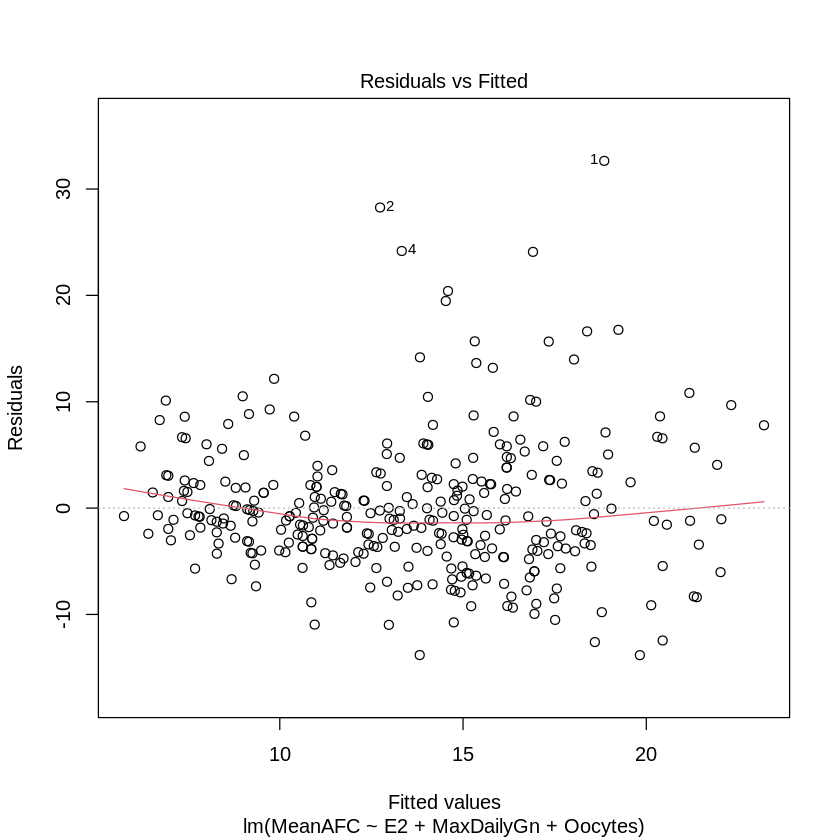

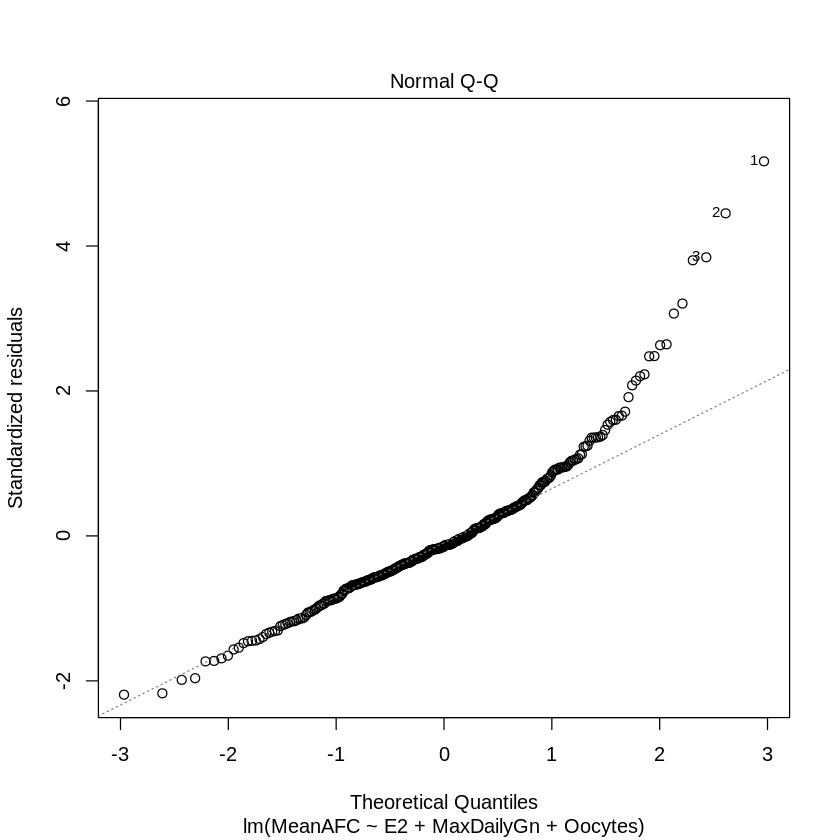

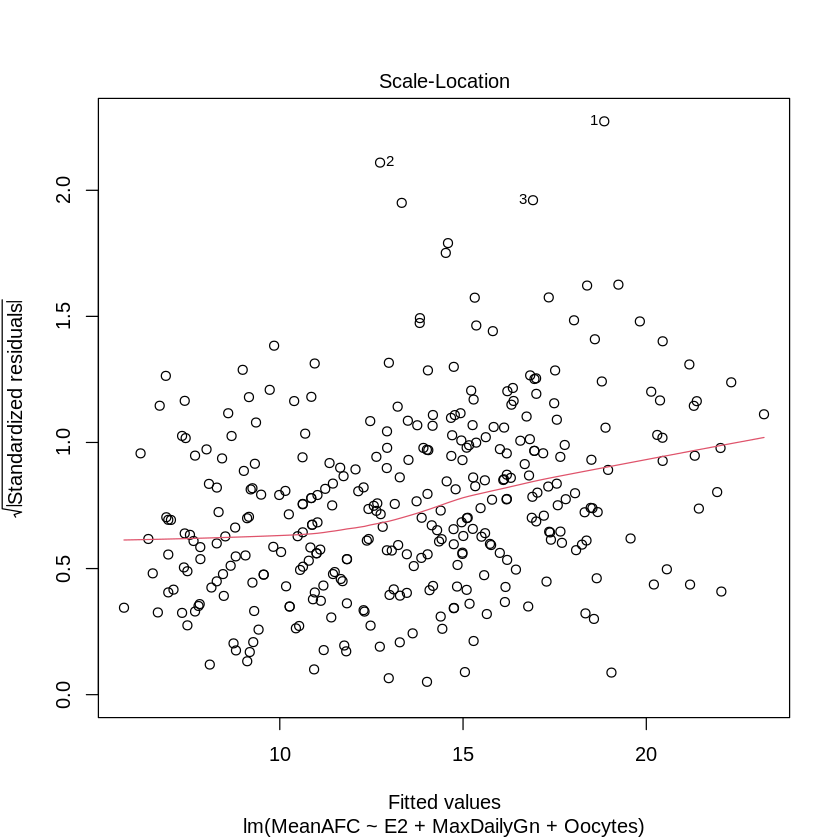

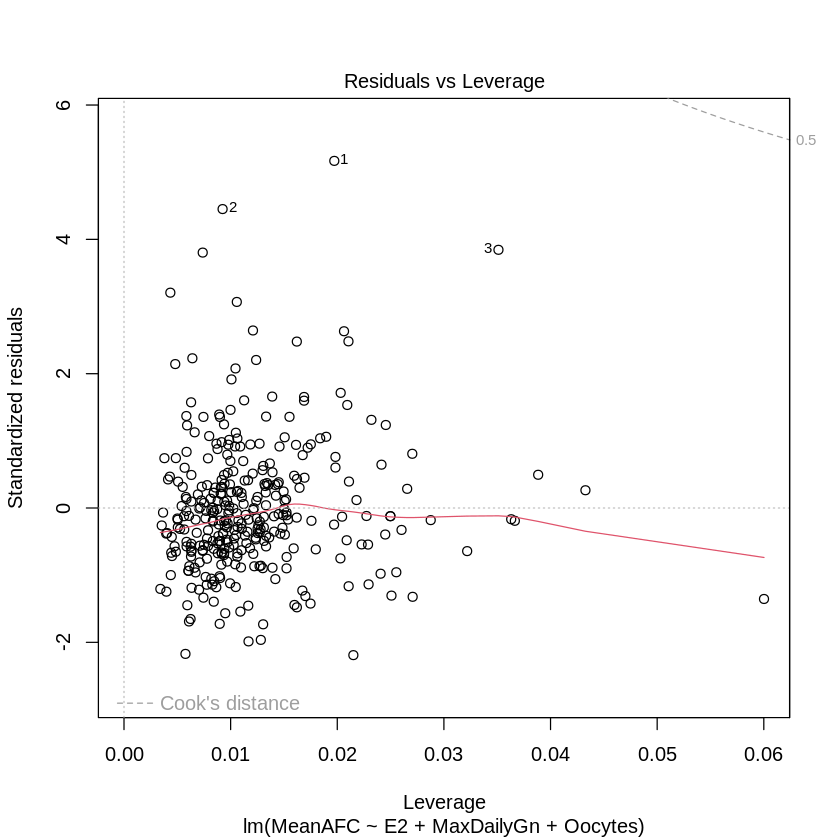

In [8]:
plot(three_var_model)

From the residual plot, there are some problems with the linearity of the model, as the residual shows a slight curvilinear relationship. \
From the residual plot, the model also has some problems with constant variance, as the residual tends to expand. \
From the normal Q-Q, the normality is also not very satisfying, the right hand side point is out of line.